<a href="https://colab.research.google.com/github/tlmartiner/Integracion_de_datos_y_prospectiva/blob/main/Parcial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Caso de estudio**

Una entidad del sector salud en Colombia, quiere llevar a cabo un estudio sobre los hábitos de las personas, y que las puede llevar a una ataque cárdiaco en américa.


De acuerdo con la base de datos **"Heart Attack Risk Prediction Dataset"** se va realir un estudio sobre correlación variables y se identificará cual es la que más se correlaciona con las demás, la cuál será la variable de integración respecto a la variable de pronóstico que será **"Heart Attack Risk"**. Luego de esto, se va a determinar cuáles son los países que tienen mayor credibilidad con Colombia mediante la utilización del método de aceptación y rechazo, se busca también las medidas de tendencia central antes y después de de la integración de los datos.

Las variables de trabajo son las siguientes:

Cholesterol, Country y Heart Attack Risk

# **0. Se cargan librerías, se hace conexión con drive, se muestran los datos e info de los datos**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  #Para gráfico de distribuciones
from scipy.stats import skew, kurtosis

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
datos = pd.read_csv("/content/drive/MyDrive/SEMESTRE 9/Integración de datos y prospectiva/Bases de datos/heart_attack_prediction_dataset.csv")
datos

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

# **1. Se incia con un código de correlación de variables para mirar cuál tiene más afinididad con cada una de las variables.**

In [4]:
# Código de correlación entre variables

datos1 = datos.select_dtypes(include=np.number) # Se seleccionan solo las columnas númericas para la correlación
datos1.corr()  #Se saca la correlación

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
Age,1.000000,-0.009107,-0.003844,-0.014105,0.008353,0.394891,-0.008140,-0.006666,0.001206,0.000868,0.000980,0.018307,0.017280,-0.001733,-0.002612,0.003415,0.001384,-0.002185,0.006403
Cholesterol,-0.009107,1.000000,0.000315,-0.013428,-0.021608,0.016342,-0.014843,-0.007261,0.021517,-0.006070,-0.000905,-0.024487,0.018914,0.000007,0.017292,-0.005454,0.016056,0.004456,0.019340
Heart Rate,-0.003844,0.000315,1.000000,0.006764,-0.013470,-0.012331,0.012725,0.003459,0.008276,-0.004956,0.009244,-0.004547,-0.010232,0.004873,0.005299,0.012244,0.000834,0.001811,-0.004251
Diabetes,-0.014105,-0.013428,0.006764,1.000000,-0.013844,0.000527,0.012866,0.005551,-0.007014,0.000867,-0.002656,0.006719,0.004705,-0.000759,-0.002852,0.010431,-0.002411,-0.012457,0.017225
Family History,0.008353,-0.021608,-0.013470,-0.013844,1.000000,0.011748,-0.001444,0.012701,-0.006378,-0.004568,0.000981,0.015637,0.002561,-0.000401,-0.011492,-0.001904,0.009561,-0.011199,-0.001652
Smoking,0.394891,0.016342,-0.012331,0.000527,0.011748,1.000000,0.003969,0.012754,-0.000150,-0.000574,-0.010877,-0.001757,0.015311,0.003096,0.007670,0.004650,-0.006465,-0.005424,-0.004051
Obesity,-0.008140,-0.014843,0.012725,0.012866,-0.001444,0.003969,1.000000,-0.024195,0.002099,0.005159,-0.006267,0.010626,-0.001333,-0.003870,-0.006058,0.001467,0.005337,-0.005314,-0.013318
Alcohol Consumption,-0.006666,-0.007261,0.003459,0.005551,0.012701,0.012754,-0.024195,1.000000,-0.008514,0.010395,0.003339,-0.005023,-0.012828,-0.022396,0.010562,0.006169,0.001593,-0.000843,-0.013778
Exercise Hours Per Week,0.001206,0.021517,0.008276,-0.007014,-0.006378,-0.000150,0.002099,-0.008514,1.000000,0.005253,-0.007119,-0.009102,0.008756,-0.023414,0.003777,0.001717,0.007725,-0.001245,0.011133
Previous Heart Problems,0.000868,-0.006070,-0.004956,0.000867,-0.004568,-0.000574,0.005159,0.010395,0.005253,1.000000,0.005336,-0.017629,-0.002694,-0.003281,0.015718,-0.019029,0.008537,0.004460,0.000274


<Axes: >

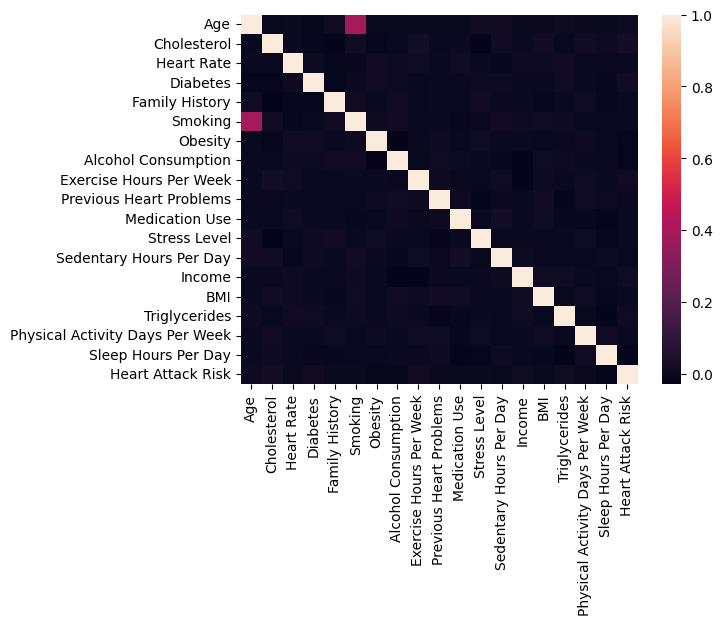

In [5]:
sns.heatmap(datos1.corr())

De acuerdo con el caso de estudio y mirando la matriz de correlación y el mapa de calor, se procede a utilizar la variable **"Cholesterol"** ya que es la que tiene mayor correlación con la variable de pronostico **"Heart Attack Risk"**

# **2. Implementación del modelo de Credibilidad**

In [8]:
filas = np.where(datos.iloc[:,22]=="Colombia")[0]
XDo = datos1.iloc[filas,1]

arrays=[]

for k in ["Argentina", "Brazil", "Canada", "Colombia", "United States"]:
  filas =np.where(datos.iloc[:,22]==k)[0]
  arr = np.zeros((len(filas), 1))
  arr = datos1.iloc[filas,1]
  XDe = arr
  arrays.append(arr)
  NDo, NDe, fc, Cr = credibilidad(XDo, XDe)
  print(f"El factor de credibilidad para {k} es: {(Cr)*100}")
  print(NDo, NDe, fc, Cr)

La credibilidad del país es: 0.16722913773939918
El factor de credibilidad para Argentina es: 0.16722913773939918
429 471 256105.24146007997 0.0016722913773939917
La credibilidad del país es: 25.150015038663497
El factor de credibilidad para Brazil es: 25.150015038663497
429 462 1276.7643875778676 0.251500150386635
La credibilidad del país es: 29.56356819249535
El factor de credibilidad para Canada es: 29.56356819249535
429 440 1022.1103572027574 0.2956356819249535
La credibilidad del país es: 0.0
El factor de credibilidad para Colombia es: 0.0
429 429 inf 0.0
La credibilidad del país es: 44.56295878659185
El factor de credibilidad para United States es: 44.56295878659185
429 420 533.6829359658183 0.4456295878659185


/tmp/ipython-input-431521361.py:15: RuntimeWarning: divide by zero encountered in scalar divide
  fc=(EPV/VHM)


In [7]:
def credibilidad(XDo,XDe):

  #1. Se calcula el valor esperado de la varianza
  NDo=len(XDo); NDe=len(XDe)
  EPV=(NDo*np.var(XDo)+NDe*np.var(XDe))/(NDo+NDe) #Valor esperado de la varianza

  #2. Valor Hipotetico de la Media (Es la media compartida)
  uh=(NDo*np.mean(XDo)+NDe*np.mean(XDe))/(NDo+NDe)

  #3. Varianza Hipótetica de la Media (Varianza del total de los Datos
  #con respecto a la media compartida)
  VHM=((NDo*np.mean(XDo)**2+NDe*np.mean(XDe)**2)/(NDo+NDe))-uh**2

  #4. Factor de Credibilidad
  fc=(EPV/VHM)
  #print("El factor de credibilidad es:",fc)

  #5. La Credibilidad es
  Cr=NDo/(NDo+fc)
  print("La credibilidad del país es:",(Cr)*100)

  return NDo, NDe,fc,Cr

# **3. Se implementa el método de Aceptación y rechazo**

Se escogen los tres países con más credibilidad respecto a Colombia.

El coeficiente de asimetría Original: 0.028433473146044334
El coeficiente de curtosis Original: -1.1716574947470142
El numero de datos integrados para Brazil fue 220
El coeficiente de asimetría Integrados: -0.13523245600332878
El coeficiente de curtosis Integrados: -1.24942154209912


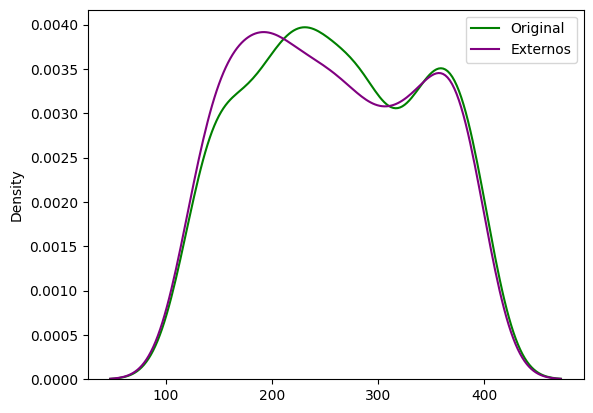

El coeficiente de asimetría Original: 0.028433473146044334
El coeficiente de curtosis Original: -1.1716574947470142
El numero de datos integrados para Canada fue 208
El coeficiente de asimetría Integrados: 0.12648165959935564
El coeficiente de curtosis Integrados: -1.20415591733207


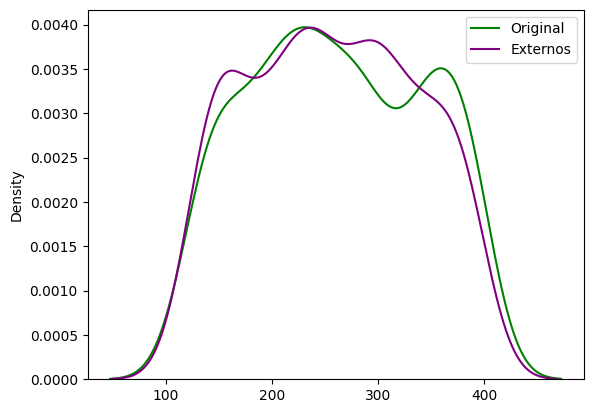

El coeficiente de asimetría Original: 0.028433473146044334
El coeficiente de curtosis Original: -1.1716574947470142
El numero de datos integrados para United States fue 202
El coeficiente de asimetría Integrados: -0.1088094305075733
El coeficiente de curtosis Integrados: -1.2425507195703187


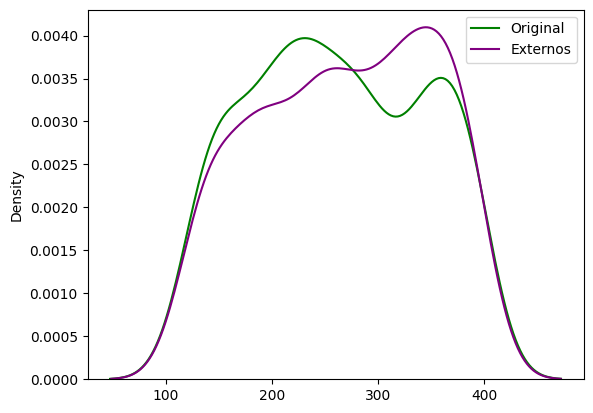

In [9]:
filas = np.where(datos.iloc[:,22]=="Colombia")[0]
XDo = datos1.iloc[filas,1]

arrays=[]

for k in ["Brazil", "Canada",  "United States"]:
  filas =np.where(datos.iloc[:,22]==k)[0]
  arr = np.zeros((len(filas), 1))
  arr = datos1.iloc[filas,1]
  XDe = arr

  XDF1=np.array(XDe);XDo=np.array(XDo)
  uo = np.mean(XDo); uf1 = np.mean(XDF1)
  sigmao = np.std(XDo); sigmaf1 = np.std(XDF1)
  print("El coeficiente de asimetría Original:", skew(XDo))
  print("El coeficiente de curtosis Original:", kurtosis(XDo))

  #Se procede con la integración de los datos externos

  XDInt = []

  for k1 in range(len(XDF1)):
    #print(XDF1[k]) #Para mirar todos los datos del F1
    x = XDF1[k1] #Dato a integrar
    VPo = np.exp(-0.5*((x-uo)/sigmao)**2)
    VPf1 = np.exp(-0.5*((x-uf1)/sigmaf1)**2)

    if VPf1<VPo:# and VPo>0.9:  #Escoger lo que tienen un valor de petenencia por encima del 90% con respecto a
                                #los datos para que no dañe los coeficientes
                                #Asegura que los datos sean confiables con respecto a los datos observados
      XDInt.append(x)

  print(f"El numero de datos integrados para {k} fue {len(XDInt)}")
  print("El coeficiente de asimetría Integrados:", skew(XDInt))
  print("El coeficiente de curtosis Integrados:", kurtosis(XDInt))

  plt.figure()
  sns.kdeplot(XDo, label = 'Original', color = 'green')
  sns.kdeplot(XDF1, label = 'Externos', color = 'purple')
  plt.legend()
  plt.show()


#**Conclusión de resultados**

De este caso de estudio podemos analizar lo siguiente:


- En la matriz de correlación se puede ver que todas la variables no tienen mayor correlación entre si. La que tiene el porcentaje más alto de acuerdo con la variable de pronóstico es **"Cholesterol"**, por lo que es la escogimos para hacer el ejercicio.

- Vemos que el mapa de calor también refleja la correlación entre las variables, de este se destaca la variable "Age" como la que tiene mayor correlación con las otras. Pero no la escogemos como variable de integración ya qué la anterior "Cholesterol" tiene más afinidad con la de pronóstico.

- **Modelo de credibilidad:**
El país que tiene mayor credibilidad respecto a Colombia es "United States con un 44.56 y el que menos tiene credibilidad es "Argentina" con un 0.16.

  Por lo que las posiciones de los países quedan de la siguiente manera:

    1. United States: 44.56
    2. Canada: 29.56
    3. Brazil: 25.15
    4. Argentina: 0.16


- **Modelo Aceptación y rechazo:**
Al hacer la integración de los datos podemos analizar que cambia mucho los resultados obtenidos de acuerdo con el coeficiente de asimetría y el coeficiente de curtosis Original. Esto se presenta en para los tres países más relevantes. El hecho de que las variables no tiene mucha correlación entre sí puede influir en el modelo.

  **Gráficas:** La integración de los datos colombianos con los de otros países genera variaciones sutiles en la forma de la distribución. Con Brasil y Estados Unidos, la asimetría se desplaza hacia la izquierda, mientras que con Canadá se mueve hacia la derecha. En todos los casos, la curtosis disminuye levemente, lo que indica una distribución menos pronunciada en comparación con la de Colombia por sí sola.
